Nscore (Real) is NEO-FFI-R Neuroticism

Escore (Real) is NEO-FFI-R Extraversion

Oscore (Real) is NEO-FFI-R Openness to experience.

Ascore (Real) is NEO-FFI-R Agreeableness.

Cscore (Real) is NEO-FFI-R Conscientiousness.

Impulsive (Real) is impulsiveness measured by BIS-11

SS (Real) is sensation seeing measured by ImpSS

Alcohol: alcohol consumption

Amphet: amphetamines consumption

Amyl: nitrite consumption

Benzos: benzodiazepine consumption

Caff: caffeine consumption

Cannabis: marijuana consumption

Choc: chocolate consumption

Coke: cocaine consumption

Crack: crack cocaine consumption

Ecstasy: ecstasy consumption

Heroin: heroin consumption

Ketamine: ketamine consumption

Legalh: legal highs consumption

LSD: LSD consumption

Meth: methadone consumption

Mushroom: magic mushroom consumption

Nicotine: nicotine consumption

Semer: class of fictitious drug Semeron consumption (i.e. control)

VSA: class of volatile substance abuse consumption

In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import (confusion_matrix, accuracy_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn.utils import resample
from itertools import combinations
from sklearn import linear_model

In [7]:
#Data cleaning - getting rid of missing values
consumption = pd.read_csv('Drug_Consumption.csv')
#drop missing data
consumption.dropna(inplace = True)

display(consumption)
print(consumption.dtypes)


,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1884,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1880,1885,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1881,1886,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1882,1887,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


ID             int64
Age           object
Gender        object
Education     object
Country       object
Ethnicity     object
Nscore       float64
Escore       float64
Oscore       float64
AScore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol       object
Amphet        object
Amyl          object
Benzos        object
Caff          object
Cannabis      object
Choc          object
Coke          object
Crack         object
Ecstasy       object
Heroin        object
Ketamine      object
Legalh        object
LSD           object
Meth          object
Mushrooms     object
Nicotine      object
Semer         object
VSA           object
dtype: object


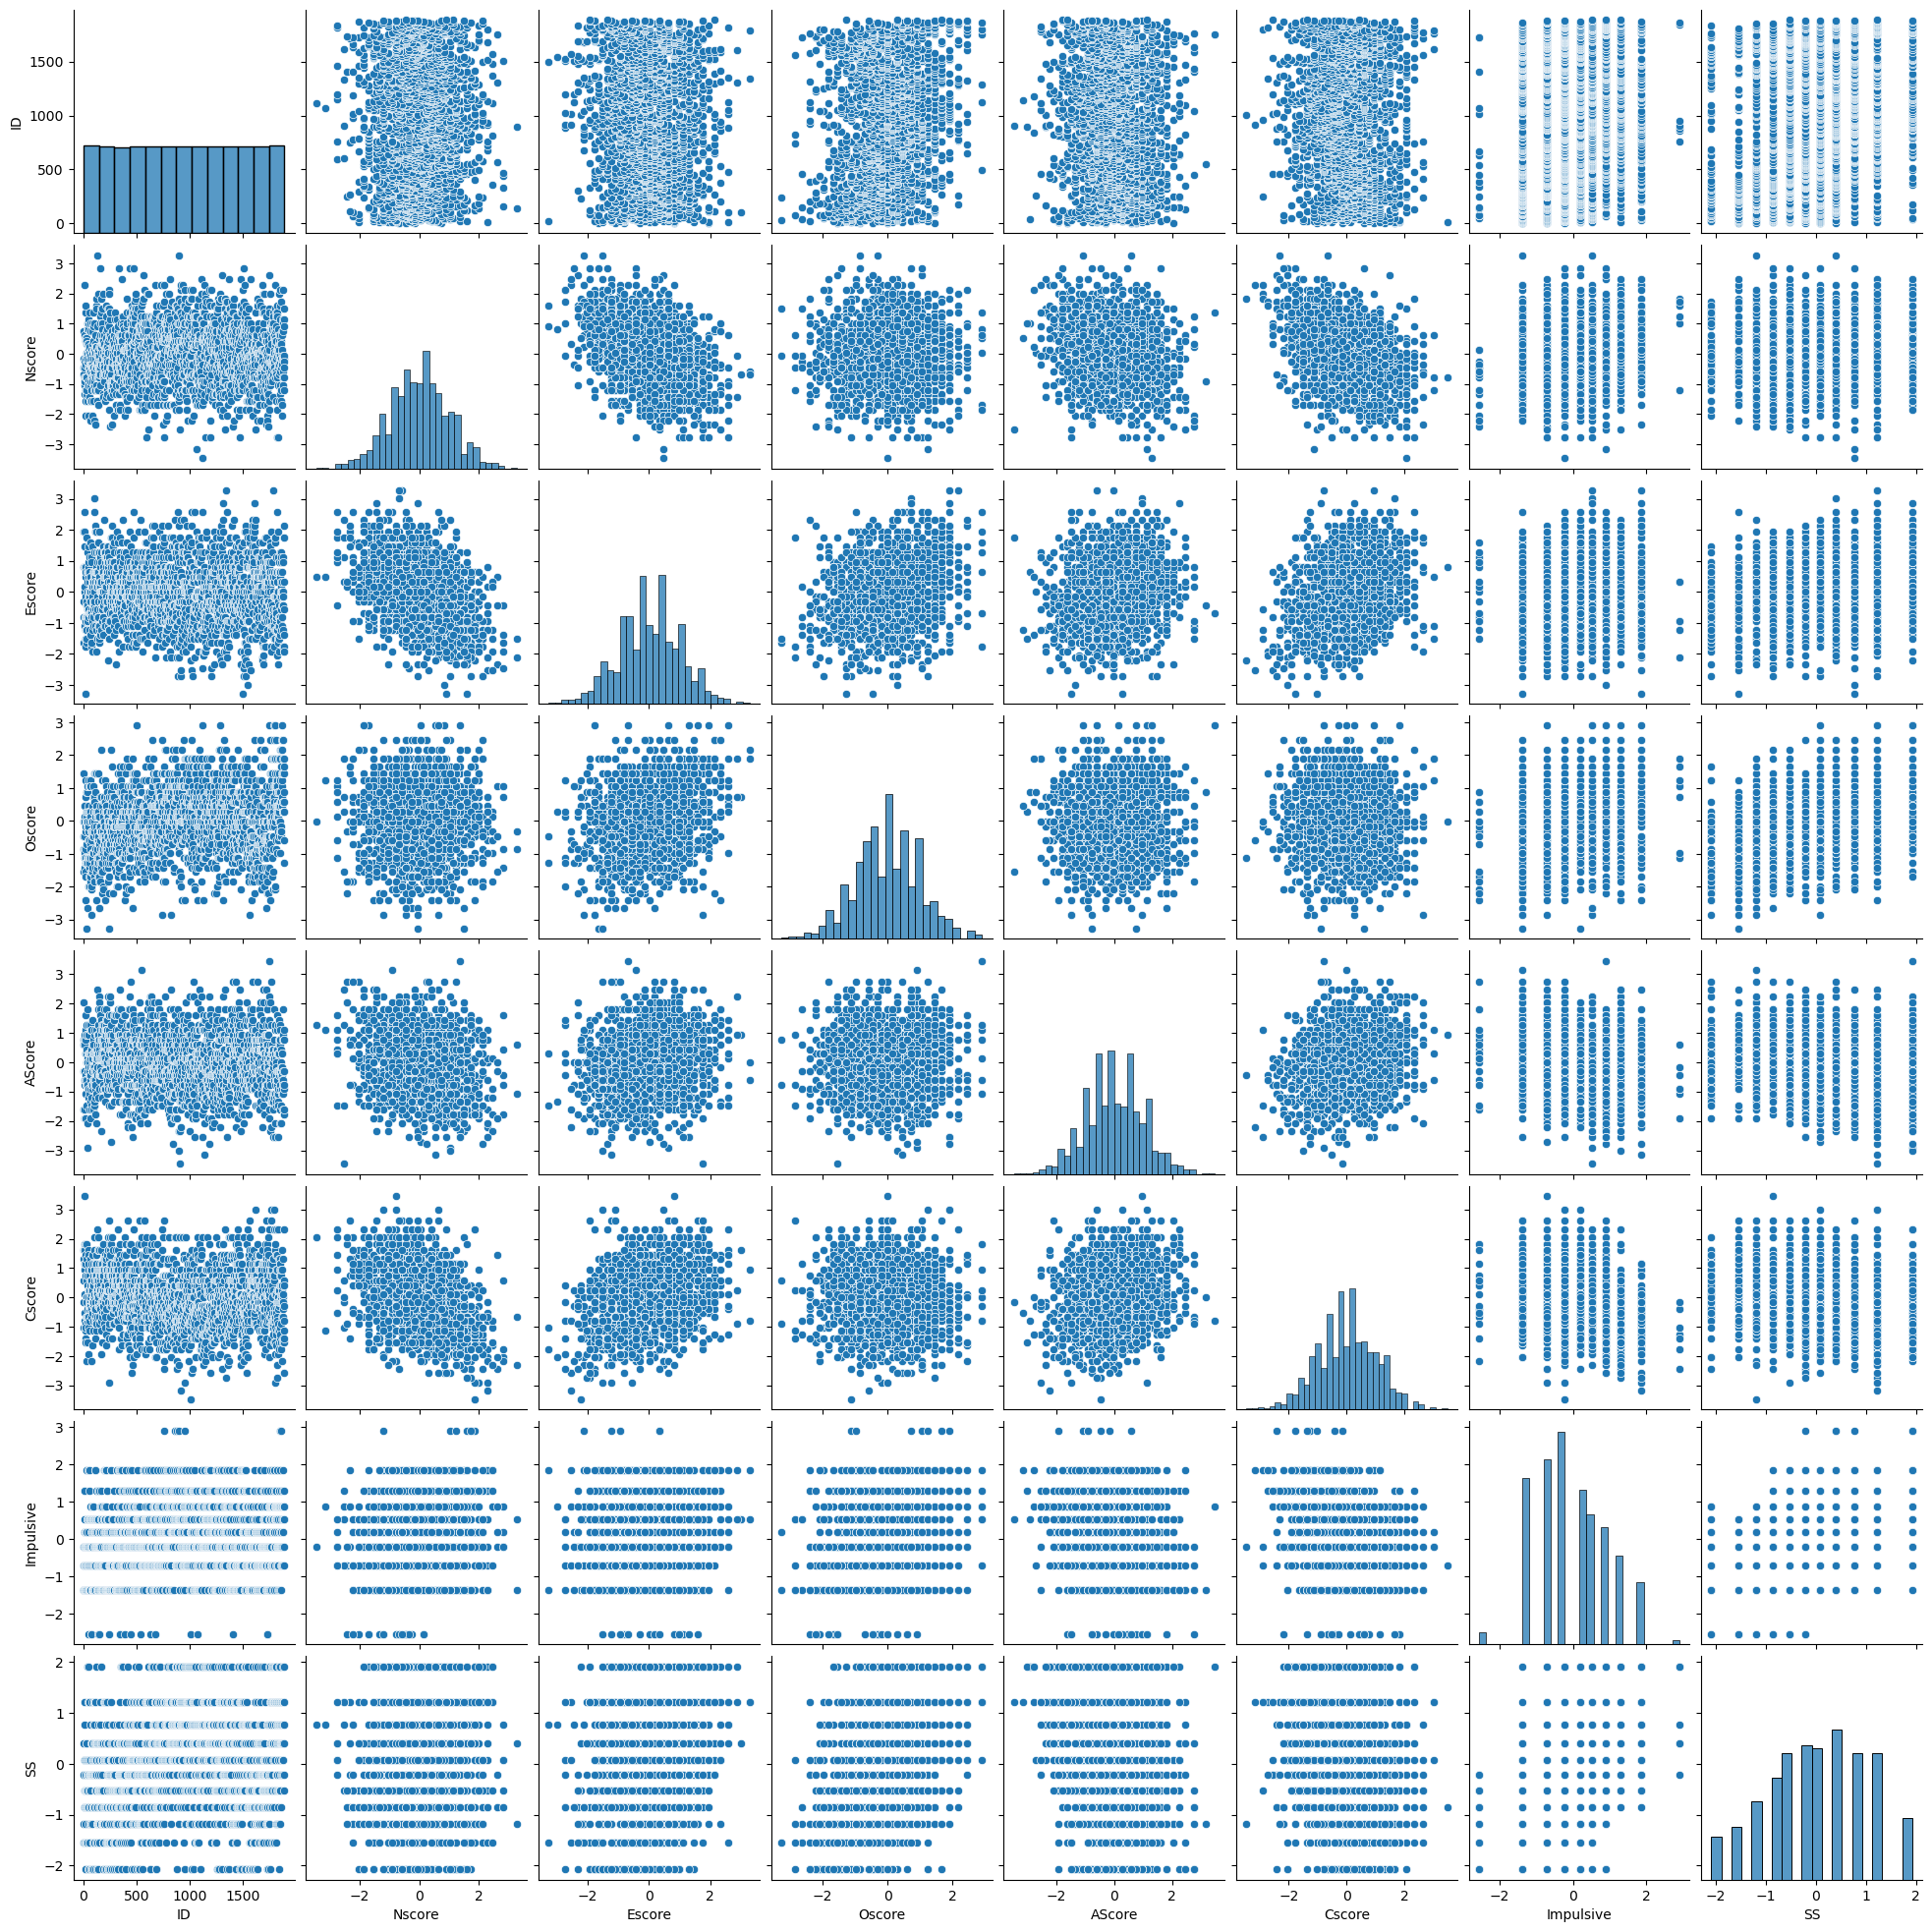

In [8]:
sns.pairplot(consumption)
plt.show()

In [11]:
print(consumption.Education.unique())
education = []
# Iterate over the values in the specified column and append them to the list
for edu in consumption['Education']:
    if (edu == 'Doctorate degree'):
        education.append(5)
    elif(edu == 'Masters degree'):
        education.append(4)
    elif(edu == 'University degree'):
        education.append(3)
    elif(edu == 'Professional certificate/ diploma'):
        education.append(2)
    elif(edu == 'Some college or university, no certificate or degree'):
        education.append(1)
    else:
        education.append(0)


counts = consumption['Education'].value_counts()
for edu, count in counts.iteritems():
    print(edu, count)
print(education)

['Doctorate degree' 'Professional certificate/ diploma' 'Masters degree'
 'Left school at 18 years' 'Left school at 16 years' 'University degree'
 'Some college or university, no certificate or degree'
 'Left school before 16 years' 'Left school at 17 years']
[5, 2, 4, 5, 0, 4, 0, 2, 4, 3, 1, 3, 2, 2, 3, 1, 0, 3, 2, 2, 0, 3, 0, 3, 1, 0, 3, 4, 5, 0, 0, 3, 3, 3, 0, 3, 0, 3, 2, 4, 3, 4, 2, 3, 3, 1, 4, 0, 4, 4, 2, 3, 4, 0, 2, 1, 3, 0, 3, 5, 4, 3, 3, 5, 1, 0, 4, 2, 0, 1, 0, 0, 2, 0, 3, 0, 3, 1, 2, 5, 3, 4, 0, 0, 0, 1, 0, 1, 4, 4, 2, 0, 0, 4, 4, 3, 4, 5, 3, 4, 0, 0, 2, 1, 2, 1, 0, 3, 1, 4, 4, 3, 2, 1, 2, 2, 3, 1, 3, 4, 2, 4, 3, 0, 3, 3, 0, 5, 4, 0, 0, 0, 4, 4, 0, 3, 3, 3, 0, 3, 0, 0, 2, 2, 3, 2, 4, 2, 3, 1, 3, 3, 3, 1, 3, 1, 0, 3, 1, 4, 3, 3, 1, 5, 4, 1, 2, 3, 0, 0, 4, 2, 3, 2, 3, 3, 3, 3, 2, 2, 5, 1, 3, 0, 3, 4, 0, 0, 4, 2, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 4, 3, 0, 3, 0, 3, 2, 3, 4, 1, 0, 2, 2, 2, 3, 2, 2, 4, 1, 3, 3, 3, 3, 3, 3, 3, 1, 4, 3, 2, 4, 3, 3, 3, 2, 4, 0, 0, 2, 4, 0, 1, 3, 3, 1, 2, 4

Some college or university, no certificate or degree 506
University degree 480
Masters degree 283
Professional certificate/ diploma 269
Left school at 18 years 100
Left school at 16 years 99
Doctorate degree 89
Left school at 17 years 30
Left school before 16 years 28
